# Common Setup

In [2]:
# Common imports
import numpy as np
import os

In [3]:
# To make this notebook's output stable across runs
np.random.seed(42)

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
# Save figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

In [6]:
def save_fig(fig_id, tight_layout = True, fig_extension = "png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving Figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Download the Data

In [7]:
import os
import tarfile
from six.moves import urllib

In [8]:
DOWNLOAD_ROOT = "https://raw.github.com/ageron/handson-ml/master/"
#DOWNLOAD_ROOT = os.path
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [9]:
# In the above step the URL in author's repo doesn't work for me, hence I have changed it.

In [10]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [11]:
fetch_housing_data()

# Load the Data

In [12]:
import pandas as pd

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [13]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

#### Take a quick look at the Data Structure

In [14]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Different categories of the Categorical attribute

In [16]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [17]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Plot the histogram

Saving Figure numerical_atrribute_histogram_plots


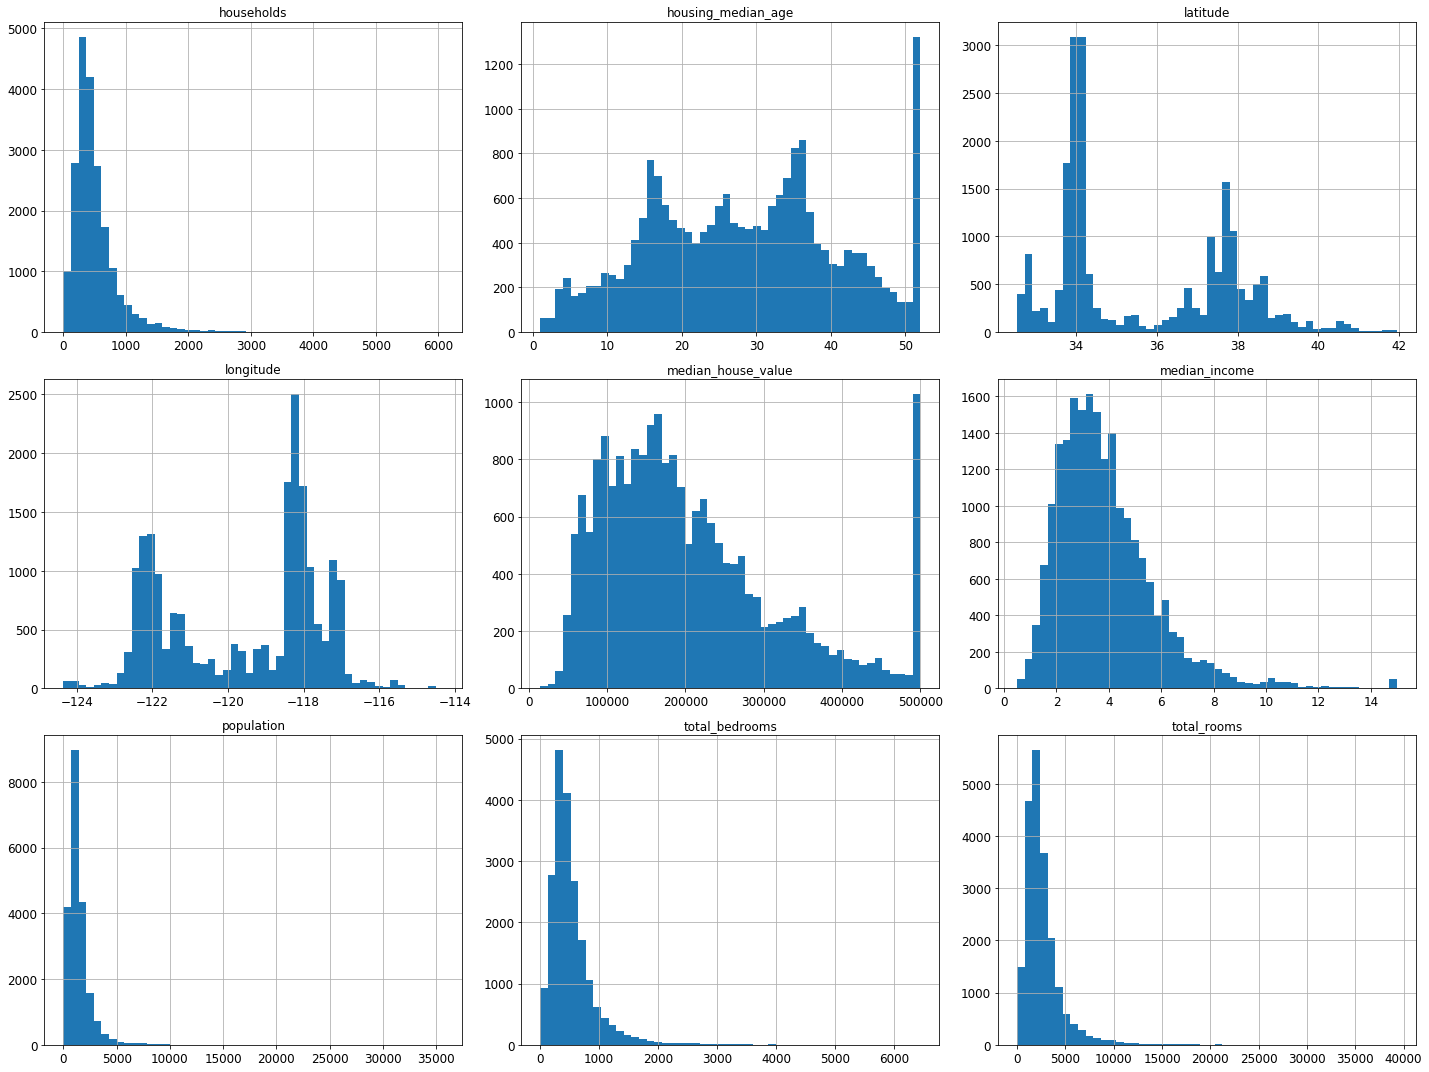

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("numerical_atrribute_histogram_plots")
plt.show()

# Create a Test Set

In [19]:
import numpy as np
np.random.seed(42)

In [20]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [21]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [22]:
import hashlib

In [23]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [24]:
def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

Hosuing data set doesnot contain the identifier column, we can use row index as id. 
For more details on understanding hash, refer - https://github.com/ageron/handson-ml/issues/71

In [25]:
housing_with_id = housing.reset_index() # adds an index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

Always new data should be appended at the end to maintain unique index as identifier. Otherwise we can use other features as identifier to have stable features in train and test set

In [26]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [27]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


Instead of above, we can Scikit-Learn function to split train and test set

In [28]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [29]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


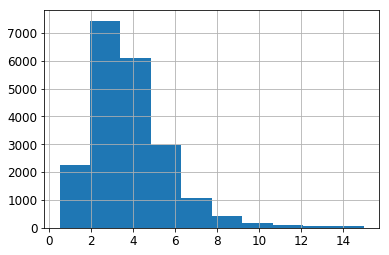

In [30]:
housing["median_income"].hist()

In [31]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                              bins = [0.,1.5,3.0,4.5,6.,np.inf], 
                              labels = [1,2,3,4,5])

In [32]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

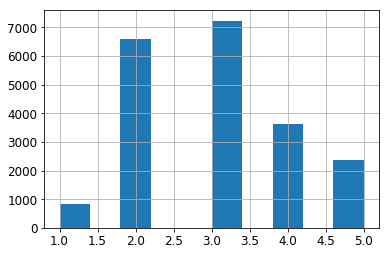

In [33]:
housing["income_cat"].hist()

Startified Sampling based on income category is done here

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [35]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [36]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [37]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

In [38]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [39]:
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random":income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. % Error"] = 100 * compare_props["Random"] /compare_props["Overall"] - 100
compare_props["Strat. % Error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [40]:
compare_props

,Overall,Stratified,Random,Rand. % Error,Strat. % Error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


The above table shows the Sampling bias between startified versus purely random sampling

In [41]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace = True)

We have removed the income_cat attribute so that the data is back in its original state.

## Discover and Visualize the Data to Gain Insights

In [42]:
housing = strat_train_set.copy()

Saving Figure bad_visualization_plot


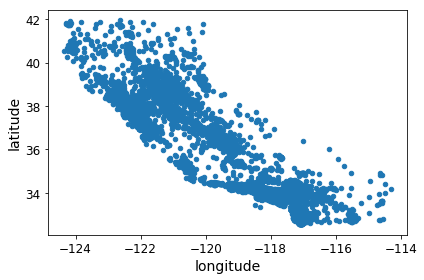

In [43]:
housing.plot(kind='scatter',x="longitude",y="latitude")
save_fig("bad_visualization_plot")

Saving Figure better_visualization_plot


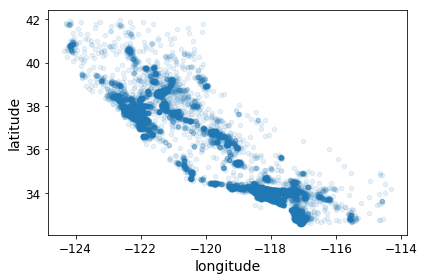

In [44]:
housing.plot(kind='scatter',x="longitude", y= "latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving Figure housing_prices_scatterplot


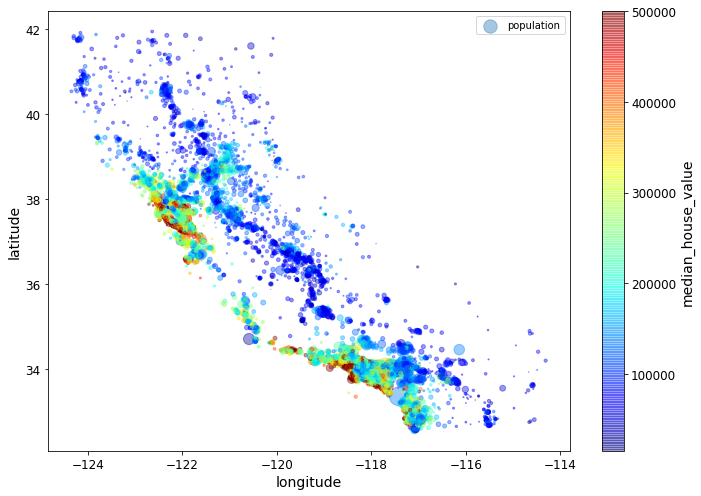

In [45]:
housing.plot(kind='scatter', x= "longitude", y="latitude",alpha=0.4,
            s=housing["population"]/100,label="population",figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

Saving Figure california_housing_prices_plot


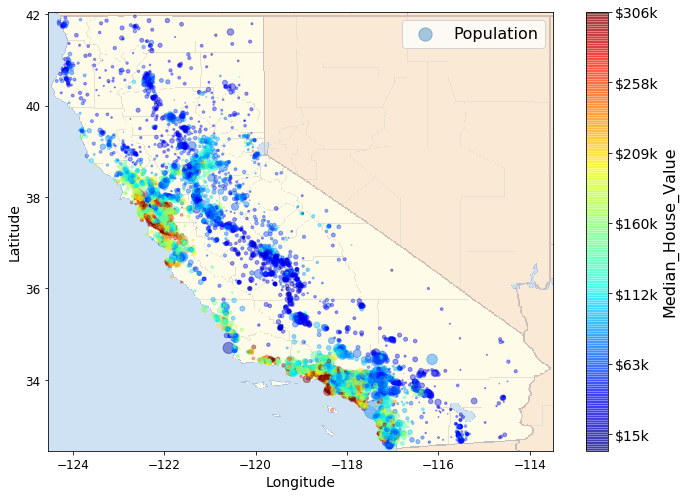

In [46]:
import matplotlib.image as mpimg
california_img = mpimg.imread(PROJECT_ROOT_DIR + "/images/end_to_end_project/california.png")
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img,extent=[-124.55,-113.50,32.45,42.05],alpha=0.5,
          cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(),prices.max(),11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values],fontsize=14)
cbar.set_label('Median_House_Value',fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## Looking for Correlations

In [47]:
corr_matrix = housing.corr()

In [48]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Saving Figure scatter_matrix_plot


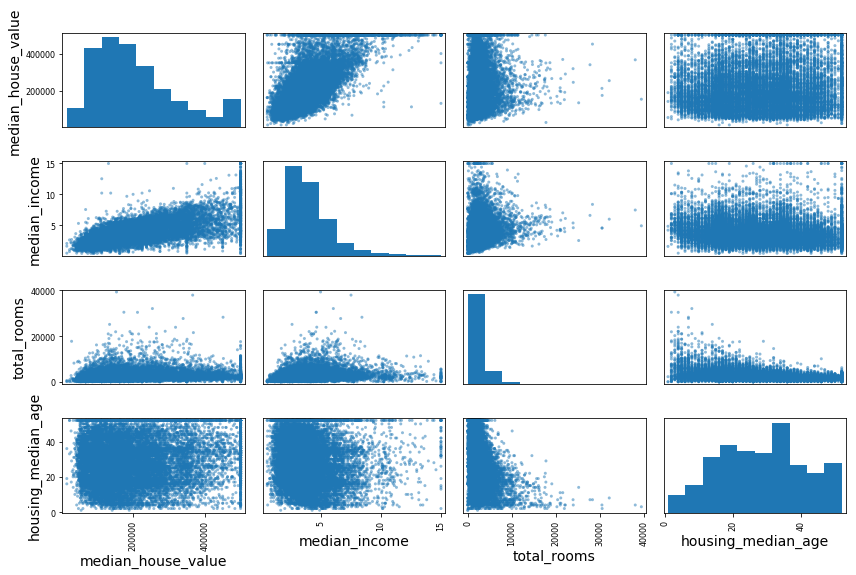

In [49]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
save_fig("scatter_matrix_plot")

Saving Figure income_vs_house_value_scatterplot


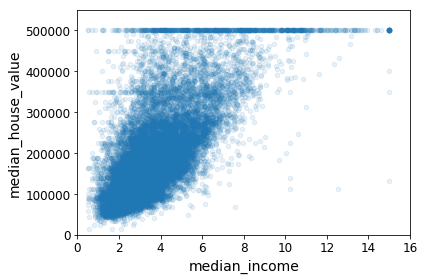

In [50]:
housing.plot(kind='scatter', x = "median_income", y = 'median_house_value', alpha = 0.1)
plt.axis([0,16,0,550000])
save_fig("income_vs_house_value_scatterplot")

### Expermienting with Attribute Combinations

In [51]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [52]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

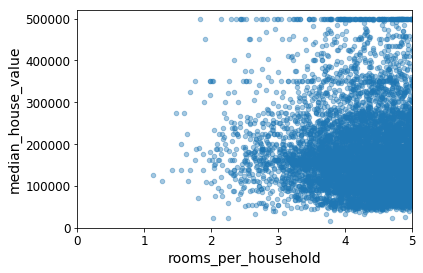

In [53]:
housing.plot(kind='scatter',x="rooms_per_household",y="median_house_value",alpha=0.4)
plt.axis([0,5,0,520000])
plt.show()

In [54]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the Data for Machine Learning Algorithms

In [55]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [56]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [57]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) #option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [58]:
sample_incomplete_rows.drop("total_bedrooms",axis=1) #option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [59]:
median = housing["total_bedrooms"].median() #option3
sample_incomplete_rows["total_bedrooms"].fillna(median,inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [60]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

I'm using SimpleImputer instead of Imputer(which is used in the book) as Imputer is deprecated from SciKit-Learn 0.20

In [61]:
housing_num = housing.drop("ocean_proximity",axis=1)
#housing_num = housing.select_dtypes(include=np.number)

In [62]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [63]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [64]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [65]:
X = imputer.transform(housing_num)

In [66]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing.index)

In [67]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [68]:
imputer.strategy

'median'

In [69]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns, index=housing.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


### Handling Text and Categorical Attributes

In [70]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [71]:
# from sklearn.preprocessing import LabelEncoder # this doesn't work well with pipelines, hence we will use ordinalencoder
# encoder = LabelEncoder()
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [72]:
print(encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [73]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
#housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

The output is a SciPy sparse matrix which stores only non-zero elements to save memory. You can convert it to a dense numpy array by using toarray() method

In [74]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Alternatively, we can specify sparse = False in OneHotEncoder

In [75]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

We can apply both transformations (from text to integer categories and integer to one-hot vectors) in one shot using the LabelBinarizer class

This returns a dense Numpy array by default, we can get sparse matrix instead by passing sparse_output=True to LabelBinarizer constructor

### Custom Transformer

Let's create a custom transformer to add extra attributes

In [76]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin
#rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6
#get the right column indices, safer than hard coding indices 3,4,5,6
rooms_ix, bedrooms_ix,population_ix,household_ix=[
    list(housing.columns).index(col)
    for col in ("total_rooms","total_bedrooms","population","households")]

In [78]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self # nothing else to do
    def transform(self,X,y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [79]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Alternatively, we can use Scikit-learn's FunctionTransformer class 

In [80]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
    population_per_household = X[:,population_ix] / X[:,household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:,bedrooms_ix]/ X[:,rooms_ix]
        return np.c_[X, rooms_per_household,population_per_household,bedrooms_per_room]
    else:
        return np.c_[X,rooms_per_household,population_per_household]

attr_adder = FunctionTransformer(add_extra_features,validate=False,
                                 kw_args={"add_bedrooms_per_room":False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [81]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,
                                    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
                                    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


### Feature Scaling

### Transformation Pipelines

Pipeline for numerical attributes

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [83]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder',FunctionTransformer(add_extra_features,validate=False)),
    ('std_scaler',StandardScaler()),
])

In [84]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

To feed Pandas DataFrame directly into the pipeline instead of extracting the numberical columns into a Numpy array, we can  write a custom transformer for this task

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin

In [86]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

Pipeline for Categorical attributes

In [87]:
num_attributes = list(housing_num)
cat_attributes = ["ocean_proximity"]

In [88]:
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attributes)),
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

In [89]:
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attributes)),
    ('label_binarizer', OneHotEncoder(sparse=False)),
])

Join these 2 pipelines using Sklearn's Feature Union class

In [90]:
from sklearn.pipeline import FeatureUnion

In [91]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [92]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [93]:
housing_prepared.shape

(16512, 16)

Instead of DataFrameSelector and FeatureUnion, we can use ColumnTransformer class

In [94]:
from sklearn.compose import ColumnTransformer 
full_pipeline_col = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline,cat_attributes)
])

In [95]:
housing_prepared_col = full_pipeline_col.fit_transform(housing)

In [96]:
housing_prepared_col

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [97]:
housing_prepared_col.shape

(16512, 16)

The result is same from both implementations.

In [98]:
np.allclose(housing_prepared,housing_prepared_col)

True

# Select and Train a Model

### Training and Evaluating on the Training Set

Let's first train a Linear Regression model 

In [99]:
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [100]:
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Done, Let's try out on a few instances from the training set

In [101]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [102]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


Compare against actual values

In [103]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [104]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

Let's measure the regression model's RMSE on the whole training set

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [107]:
from sklearn.metrics import mean_absolute_error

In [108]:
lin_mae = mean_absolute_error(housing_labels,housing_predictions)
lin_mae

49439.89599001897

This model is not regularized, hence we can rule out the last option. We could try adding more features, but let's try first with a more complex model to see how it does

Let's train a DecisionRegressor

In [109]:
from sklearn.tree import DecisionTreeRegressor

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [110]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Now the model is trained, let's evaluate on the training set:

In [111]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions,housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Vaidation

Let's use SciKit Learn's cross-validation feature. It performs k-fold cross validaton, where it randomly splits the training set into 10 distinct subsets called folds. And later, it trains and evaluates the decision tree model 10 times by picking different fold each time.

In [112]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared,housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

Scikit Learn cross-validation features expect a utility function (greater is better) rather than cost_function (lesser is better), so the scoring function is negative value.

In [113]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [114]:
display_scores(tree_rmse_scores)

Scores: [69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
Mean: 70666.74616904806
Standard deviation: 2928.322738055112


In [115]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [116]:
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345084
Standard deviation: 2731.6740017983466


Decision Tree is overfitting so badly it performs worse than Linear Regression Model

Let's try RandomForestRegressor model

In [117]:
from sklearn.ensemble import RandomForestRegressor

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [118]:
forest_reg = RandomForestRegressor(n_estimators=10,random_state=42)
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [119]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean: 52583.72407377466
Standard deviation: 2298.353351147122


In [122]:
scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
pd.Series(np.sqrt(-scores))

0    66782.738440
1    66960.118071
2    70347.952444
3    74739.570526
4    68031.133889
5    71193.841834
6    64969.630564
7    68281.611380
8    71552.915666
9    67665.100821
dtype: float64

In [123]:
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

Let's try out Support Vector Machines algorithm

In [124]:
from sklearn.svm import SVR

In [125]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared,housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels,housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

## Fine-Tune Your Model

### Grid Search

In [126]:
from sklearn.model_selection import GridSearchCV

In [130]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3,10,30],'max_features':[2,4,6,8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]
forest_reg=RandomForestRegressor()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [131]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [132]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

Evaluation Scores for each hyperparamter combination can be found by - 

In [133]:
cvres = grid_search.cv_results_

In [134]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

63719.49981352845 {'max_features': 2, 'n_estimators': 3}
56222.28710305008 {'max_features': 2, 'n_estimators': 10}
52730.9576819293 {'max_features': 2, 'n_estimators': 30}
60607.41472306502 {'max_features': 4, 'n_estimators': 3}
53230.75752363361 {'max_features': 4, 'n_estimators': 10}
50461.38663460923 {'max_features': 4, 'n_estimators': 30}
58998.71181990497 {'max_features': 6, 'n_estimators': 3}
52093.01120701726 {'max_features': 6, 'n_estimators': 10}
49991.575820389044 {'max_features': 6, 'n_estimators': 30}
58773.355697800536 {'max_features': 8, 'n_estimators': 3}
52080.462418593524 {'max_features': 8, 'n_estimators': 10}
50371.120903838506 {'max_features': 8, 'n_estimators': 30}
62512.612507194724 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54542.66833209156 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60029.00654748691 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52473.83315851103 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [135]:
pd.DataFrame(grid_search.cv_results_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.064642,7.667423e-03,0.001600,1.959742e-03,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.947748e+09,-4.008456e+09,...,-4.060175e+09,1.036699e+08,18,-1.121954e+09,-1.108882e+09,-1.146561e+09,-1.111590e+09,-1.088799e+09,-1.115557e+09,1.885954e+07
1,0.215361,6.282058e-03,0.006240,7.642391e-03,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973188e+09,-3.302871e+09,...,-3.160946e+09,1.976781e+08,11,-5.886677e+08,-6.057907e+08,-5.974600e+08,-5.848299e+08,-5.895604e+08,-5.932617e+08,7.490019e+06
2,0.630641,8.156845e-03,0.031200,1.784161e-07,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.625147e+09,-2.934115e+09,...,-2.780554e+09,1.433269e+08,8,-4.455578e+08,-4.411499e+08,-4.153810e+08,-4.167952e+08,-4.181301e+08,-4.274028e+08,1.312718e+07
3,0.106080,6.239939e-03,0.000000,0.000000e+00,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.324686e+09,-3.795699e+09,...,-3.673259e+09,2.679512e+08,16,-9.915124e+08,-9.926360e+08,-9.762366e+08,-9.352171e+08,-1.039048e+09,-9.869301e+08,3.334195e+07
4,0.340081,6.240058e-03,0.009360,7.642469e-03,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.701038e+09,-2.929212e+09,...,-2.833514e+09,1.300771e+08,9,-5.168812e+08,-5.144531e+08,-5.220975e+08,-5.489695e+08,-5.306359e+08,-5.266074e+08,1.248164e+07
5,1.010882,6.239939e-03,0.028080,6.240034e-03,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.397332e+09,-2.692848e+09,...,-2.546352e+09,1.234328e+08,3,-3.967080e+08,-3.909444e+08,-3.929221e+08,-3.938539e+08,-3.924210e+08,-3.933699e+08,1.916319e+06
6,0.140400,1.784161e-07,0.000000,0.000000e+00,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.414643e+09,-3.487775e+09,...,-3.480848e+09,1.013580e+08,14,-9.167085e+08,-8.870365e+08,-9.218926e+08,-9.455789e+08,-9.433990e+08,-9.229231e+08,2.126065e+07
7,0.471121,6.240010e-03,0.009360,7.642430e-03,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.612003e+09,-2.708091e+09,...,-2.713682e+09,1.608378e+08,6,-5.137473e+08,-4.914205e+08,-4.927598e+08,-5.040280e+08,-5.122340e+08,-5.028379e+08,9.387669e+06
8,1.407123,1.167392e-02,0.028080,6.239986e-03,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.299598e+09,-2.543254e+09,...,-2.499158e+09,1.508569e+08,1,-3.819760e+08,-3.837613e+08,-3.784124e+08,-3.901258e+08,-3.862745e+08,-3.841100e+08,3.950006e+06
9,0.181284,5.963392e-03,0.004920,5.464892e-03,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.401747e+09,-3.725255e+09,...,-3.454307e+09,1.652394e+08,13,-9.365569e+08,-9.111822e+08,-8.388018e+08,-8.867257e+08,-8.638295e+08,-8.874192e+08,3.435054e+07


### Randomized SearchCV

In [137]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [138]:
param_distribs = {
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=8)
}

In [139]:
forest_reg=RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                             n_iter=10, cv=5, scoring="neg_mean_squared_error", random_state=42)
rnd_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000000285DA160>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000001232C668>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [140]:
cvres=rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

49150.657232934034 {'max_features': 7, 'n_estimators': 180}
51389.85295710133 {'max_features': 5, 'n_estimators': 15}
50796.12045980556 {'max_features': 3, 'n_estimators': 72}
50835.09932039744 {'max_features': 5, 'n_estimators': 21}
49280.90117886215 {'max_features': 7, 'n_estimators': 122}
50774.86679035961 {'max_features': 3, 'n_estimators': 75}
50682.75001237282 {'max_features': 3, 'n_estimators': 88}
49608.94061293652 {'max_features': 5, 'n_estimators': 100}
50473.57642831875 {'max_features': 3, 'n_estimators': 150}
64429.763804893395 {'max_features': 5, 'n_estimators': 2}


### Analyze the Best Models and Their Errors

In [141]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.95069453e-02, 7.44916993e-02, 4.04354138e-02, 1.65501102e-02,
       1.73231564e-02, 1.77557612e-02, 1.58778105e-02, 3.02681413e-01,
       5.93430425e-02, 1.10421365e-01, 9.24597823e-02, 7.22036631e-03,
       1.57993436e-01, 9.45085982e-05, 2.64346643e-03, 5.20172385e-03])

In [146]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline_col.named_transformers_["cat"]
cat_one_hot_attribs = list(encoder.categories_[0])
attributes = num_attributes + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes), reverse = True)

[(0.3026814132001881, 'median_income'),
 (0.15799343579238515, 'INLAND'),
 (0.11042136450843305, 'pop_per_hhold'),
 (0.09245978226314286, 'bedrooms_per_room'),
 (0.07950694528486123, 'longitude'),
 (0.07449169933004463, 'latitude'),
 (0.05934304249324932, 'rooms_per_hhold'),
 (0.040435413779518384, 'housing_median_age'),
 (0.01775576115597055, 'population'),
 (0.017323156361800884, 'total_bedrooms'),
 (0.01655011015893771, 'total_rooms'),
 (0.015877810487076267, 'households'),
 (0.007220366312864992, '<1H OCEAN'),
 (0.005201723845506759, 'NEAR OCEAN'),
 (0.0026434664278564435, 'NEAR BAY'),
 (9.450859816373917e-05, 'ISLAND')]

### Evaluate your system on the test set

In [148]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47874.75475424307

#### Compute a 95% confidence interval for the test RMSE

In [149]:
from scipy import stats

In [151]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)
np.sqrt(stats.t.interval(confidence, m - 1, 
                        loc=np.mean(squared_errors),
                        scale = stats.sem(squared_errors)))

array([45896.20580824, 49774.71826103])

Alternatively, we can comute z-scores rather than t-scores like this

In [153]:
zscore=stats.norm.ppf((1+confidence)/2)
zmargin=zscore*squared_errors.std(ddof=1)/np.sqrt(m)
np.sqrt(mean - zmargin),np.sqrt(mean+zmargin)

(45896.7985768378, 49774.171675227124)

Check author's repository for excercise solution.